Codes used to type and visualise the answers can be found [here](https://github.com/Satriawidy/ortvay_2026)

**Question**

Two bodies of mass m can move along a straight line, and the interaction is given by a pair potential $V(x_1 − x_2)$. Let us assume the symmetry $V(x) = V(−x)$. The potential is unknown, and we intend to obtain information about it, using a thought experiment which is motivated by particle physics. We initialize the two particles far apart, with velocities $v$ and $−v$. We don’t have an apparatus to follow the entire motion, but we can measure the trajectories of the two particles after a long time. Let us assume that the two masses don’t stick together, so the two particles either pass each other or there is a full reflection. If there was no interaction, then the trajectory of one of the particles could be described in a suitable coordinate system with the equation $x = vt$. In the case of the interaction let us assume that a long time before scattering, the trajectory is $x = vt$ to a good approximation. After scattering we find $x = vt+d$ to a good approximation. What can the sign of the shift $d$ tell us about whether the potential is attractive or repulsive? Given the velocity dependence of the displacement $d$, how can we deduce the shape of the potential? Let us examine some simple cases!


**Answer**

One equation that we can use to constraint is the conservation of energy
\begin{equation*}
    E = \frac{1}{2}v_1^2 + \frac{1}{2}v_2^2 + \Phi(x_1-x_2)
\end{equation*}
Assuming the centre of mass of this system is at $x=0$, we can conclude that $v_1 = v_2 = v$ and $x_1-x_2 = 2x_1 = 2x$, leading to a simpler equation
\begin{equation*}
    E = v^2 + V(x)
\end{equation*}
where we have defined $\Phi(2x) = V(x)$.

**Logical constraint**

Knowing that far before scattering, $v = v_0$ (Let us use $v$ for the velocity and $v_0$ for the initial velocity), we can conclude that $\lim_{x\rightarrow \infty}V(x) = 0$. There are several potential form that can satisfy this requirement, such as $V(x) = 1/|x|, 1/x^2, \exp(-x^2)$, and so on. Knowing that $v \rightarrow v_0$ as $V(x)\rightarrow 0$, we can write the energy equation as

\begin{equation*}
    v_0^2 = v^2 + V(x) \implies v^2 = v_0^2 - V(x)
\end{equation*}

This gives a very useful insight. An **attractive** potential ($V(x) = - |V(x)|$) will make $v^2$ always bigger than $v_0$, which should correspond to **positive** $d$ in $x = v_0t + d$. On the other hand, the repulsive potential is a bit tricky since we can have $v^2 = 0$, in which the particle may just go in the opposite direction afterwards. However, we can confidently make a remark that for **repulsive** potential with $V(0) < v_0^2$ (possible for the like of $\exp(-x^2)$), we will always have $v < v_0$ and thus correspond to **negative** $d$.

**Analytic**

Analytically, considering only the 'safe' potential, we will have
\begin{equation*}
\frac{dx}{dt} = v = \sqrt{v_0^2 - V(x)} \implies \int_{x_0}^{x}\frac{dx'}{\sqrt{1 - V(x')/v_0^2}} = \int_{0}^{t}v_0~dt'
\end{equation*}

We could numerically integrate both sides to obtain a definite expression of $x = v_0t + d$.

**Approximation**

Let us consider the case where $V(0) \ll v_0^2$. The integral can be approximated as

\begin{align*}
\int_{x_0}^{x}dx'~\left[1 + \frac{V(x')}{2v_0^2}\right] = v_0t \implies x - x_0 = v_0 t - \frac{1}{2v_0^2}\int_{x_0}^{x}dx'~V(x')
\end{align*}

This is incredible, as we get to know that 
1. $d$ is inversely proportional to $v_0^2$
2. We can obtain the shape of the potential by taking the derivative of $d$ with respect to $x$, as $d'(x) = -\frac{V(x)}{2v_0^2}$.

**Numerical test**

Let us simulate the motion for several example of potential. In this case, $dv/dt = -V'(x)/2 = F(x)$

In [28]:
import numpy as np

def Euler(x0, v0, times, acc):
    xs = np.zeros_like(times)
    vs = np.zeros_like(times)
    xs[0] = x0 + 0
    vs[0] = v0 + 0
    i = 0
    for t0, t1 in zip(times[:-1], times[1:]):
        i += 1
        dt = t1-t0
        xs[i] = xs[i-1] + vs[i-1] * dt
        vs[i] = vs[i-1] + acc(xs[i]) * dt
    return xs, vs

In [29]:
func = [lambda x: 2*x*np.exp(-x**2), 
        lambda x: -2*x*np.exp(-x**2), 
        lambda x: 0]
v0s = np.array([5, 10, 20, 40])
x0 = -100
times = np.arange(0, 40, 0.01)

X = np.zeros((3, 4, len(times)))
V = np.zeros((3, 4, len(times)))

for i, f in enumerate(func):
    for j, v0 in enumerate(v0s):
        xs, vs = Euler(x0, v0, times, f)
        X[i][j] = xs + 0
        V[i][j] = vs + 0

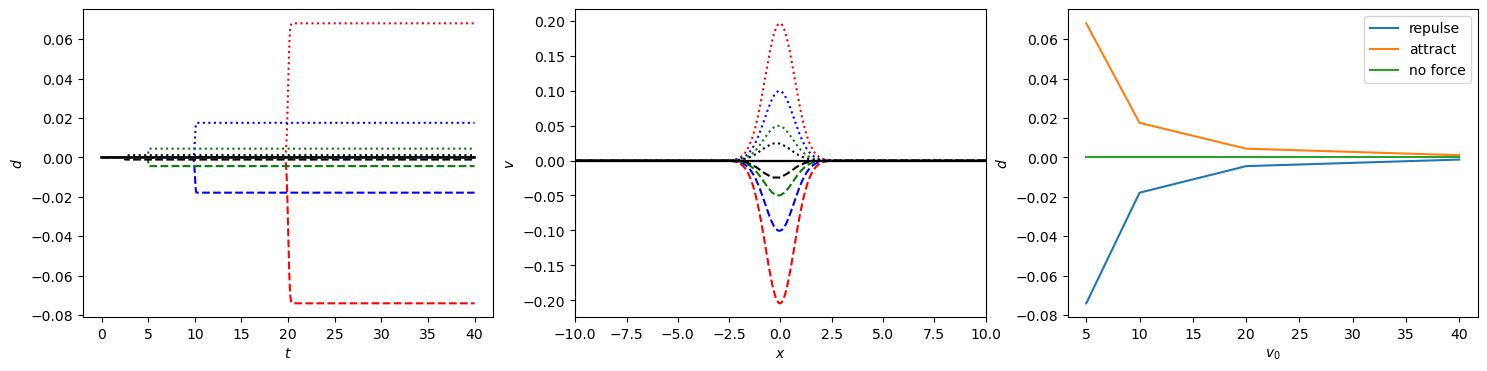

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4))
ax = ax.flatten()

line = ['dashed', 'dotted', 'solid']
name = ['repulse', 'attract', 'no force']
clrs = ['r', 'b', 'g', 'k']

for i, f in enumerate(func):
    for j, v0 in enumerate(v0s):
        ax[0].plot(times, X[i][j]-x0-v0*times, linestyle = line[i], 
                   color = clrs[j], label = f'{name[i]}, v0 = {v0}')
        ax[1].plot(X[i][j], V[i][j]-v0, linestyle = line[i], 
                   color = clrs[j], label = f'{name[i]}, v0 = {v0}')
    ax[2].plot(v0s, X[i,:,-1]-x0-v0s*times[-1], label = f'{name[i]}')
ax[1].set_xlim(-10, 10)
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$d$')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$v$')
ax[2].set_xlabel(r'$v_0$')
ax[2].set_ylabel(r'$d$')
ax[2].legend()
plt.show()

We have shown in the plot above that 
1. repulsive potential (in this case $V(x) = 2\exp(-x^2) = \exp(-x^2) \implies F(x) = 2x\exp(-x^2)$) produce negative $d$, while the attractive one ($V(x) = -2\exp(-x^2) \implies F(x) = -2x\exp(-x^2)$) produce positive $d$.
2. For our choice of initial velocity (5 to 40), we get symmetric $v(x)$ between the attractive and repulsive force, representing the equation $v = v_0 - \frac{V(x)}{2v_0}$. This might not be the case for smaller value of $v_0$.
3. In the third plot, albeit a bit ambiguously, we can see that $d \sim 1/v_0^2$. 

**Can we obtain V(x) from d?**

Now let us see if we can truly obtain $V(x)$ from $d$ data throughout the run. Note that the part of data that is most important is around $x=0$, as that is where $V(x)$ influence the velocity the most.

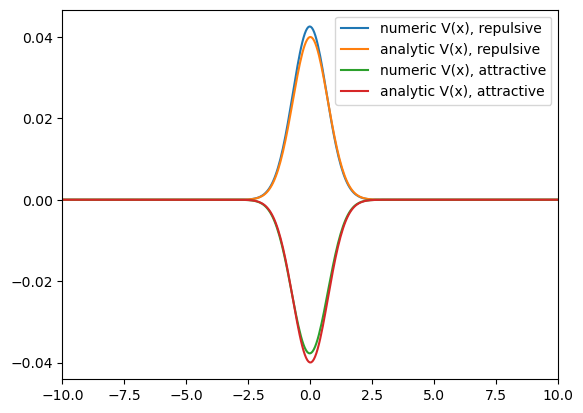

In [31]:
der = -((X[0,0,1:]-v0s[0]*times[1:])-(X[0,0,:-1]-v0s[0]*times[:-1]))
der = der / (X[0,0,1:] - X[0,0,:-1])
plt.plot(X[0,0,:-1], der, label = 'numeric V(x), repulsive')
plt.plot(X[0,0], 2 * np.exp(-X[0,0]**2) / (2 * (v0s[0]**2)), 
         label = 'analytic V(x), repulsive')

der = -((X[1,0,1:]-v0s[0]*times[1:])-(X[1,0,:-1]-v0s[0]*times[:-1]))
der = der / (X[1,0,1:] - X[1,0,:-1])
plt.plot(X[1,0,:-1], der, label = 'numeric V(x), attractive')
plt.plot(X[1,0], -2 * np.exp(-X[1,0]**2) / (2 * (v0s[0]**2)), 
         label = 'analytic V(x), attractive')

plt.legend()
plt.xlim(-10, 10)
plt.show()

We obtain an astonishingly accurate potential!